In [80]:
import requests, json

In [81]:
import pandas as pd
from tqdm import tqdm

In [82]:
url = requests.get("https://jphacks.github.io/D_2201/data/osaka-img2score.geojson")
text = url.text
data = json.loads(text)
scores = []
lat1 = []
lat2 = []
lon1 = []
lon2 = []
for apoly in tqdm(data["features"]):
  scores.append(apoly["properties"]["score"])
  lats = set()
  lons = set()
  for point in apoly["geometry"]["coordinates"][0]:
    lats.add(point[1])
    lons.add(point[0])
  lats = sorted(list(lats))
  lons = sorted(list(lons))
  lat1.append(lats[0])
  lat2.append(lats[1])
  lon1.append(lons[0])
  lon2.append(lons[1])

100%|██████████| 2500/2500 [00:00<00:00, 166779.49it/s]


In [83]:
df = pd.DataFrame()
df["scores"] = scores
df["lat1"] = lat1
df["lat2"] = lat2
df["lon1"] = lon1
df["lon2"] = lon2
df.head()

,scores,lat1,lat2,lon1,lon2
0,0.000000,34.792,34.8,135.400,135.408
1,64.404963,34.792,34.8,135.408,135.416
2,76.801136,34.792,34.8,135.416,135.424
3,58.871519,34.792,34.8,135.424,135.432
4,86.148155,34.792,34.8,135.432,135.440


In [84]:
df[df['scores'] != 0].describe()

,scores,lat1,lat2,lon1,lon2
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000
mean,77.421308,34.595922,34.603922,135.596078,135.604078
std,10.634337,0.115427,0.115427,0.115427,0.115427
min,33.862587,34.400000,34.408000,135.400000,135.408000
25%,71.420435,34.496000,34.504000,135.496000,135.504000
50%,77.813415,34.592000,34.600000,135.600000,135.608000
75%,83.270764,34.696000,34.704000,135.696000,135.704000
max,105.238717,34.792000,34.800000,135.792000,135.800000


In [85]:
df.to_csv("osaka.csv",index=False)

In [86]:
url = requests.get("https://jphacks.github.io/D_2201/data/osaka-data2score.geojson")
text = url.text
data = json.loads(text)
scores2 = []
lat1 = []
lat2 = []
lon1 = []
lon2 = []
for apoly in tqdm(data["features"]):
  scores2.append(apoly["properties"]["score"])
  lats = set()
  lons = set()
  for point in apoly["geometry"]["coordinates"][0]:
    lats.add(point[1])
    lons.add(point[0])
  lats = sorted(list(lats))
  lons = sorted(list(lons))
  lat1.append(lats[0])
  lat2.append(lats[1])
  lon1.append(lons[0])
  lon2.append(lons[1])

100%|██████████| 2500/2500 [00:00<00:00, 224241.57it/s]


In [87]:
df1 = pd.DataFrame()
df1["si"] = scores
df1["sd"] = scores2
df1["lat1"] = lat1
df1["lat2"] = lat2
df1["lon1"] = lon1
df1["lon2"] = lon2
df1.head()

,si,sd,lat1,lat2,lon1,lon2
0,0.000000,0.987029,34.792,34.8,135.400,135.408
1,64.404963,0.987029,34.792,34.8,135.408,135.416
2,76.801136,0.987029,34.792,34.8,135.416,135.424
3,58.871519,0.987029,34.792,34.8,135.424,135.432
4,86.148155,0.987029,34.792,34.8,135.432,135.440


In [88]:
df1["si"] = df1["si"] - 30
df1.loc[(df1['si'] < 0), 'si'] = 0
df1.head()

,si,sd,lat1,lat2,lon1,lon2
0,0.000000,0.987029,34.792,34.8,135.400,135.408
1,34.404963,0.987029,34.792,34.8,135.408,135.416
2,46.801136,0.987029,34.792,34.8,135.416,135.424
3,28.871519,0.987029,34.792,34.8,135.424,135.432
4,56.148155,0.987029,34.792,34.8,135.432,135.440


In [89]:
df1.describe()

,si,sd,lat1,lat2,lon1,lon2
count,2500.000000,2500.000000,2500.00000,2500.00000,2500.00000,2500.00000
mean,47.402339,0.673323,34.59600,34.60400,135.59600,135.60400
std,10.674427,0.293679,0.11547,0.11547,0.11547,0.11547
min,0.000000,0.000000,34.40000,34.40800,135.40000,135.40800
25%,41.417497,0.611494,34.49600,34.50400,135.49600,135.50400
50%,47.811391,0.735386,34.59600,34.60400,135.59600,135.60400
75%,53.266065,0.866220,34.69600,34.70400,135.69600,135.70400
max,75.238717,0.987029,34.79200,34.80000,135.79200,135.80000


In [90]:
df1["score"] = 128 - df1["si"]*1.5 + df1["sd"]*128
df1 = df1.drop(["si","sd"],axis=1)

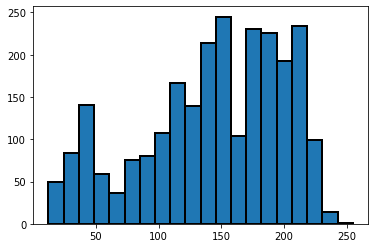

In [91]:
def cscore(ps):
  mean = 160
  ps = ps-mean
  if ps<0:
    ps = -ps/mean
    ps = ps**0.7
    ps = -ps*mean
    ps = ps+mean
  else:
    ps = ps/(255-mean)
    ps = ps**0.5
    ps = ps*(255-mean)
    ps = ps+mean
  return ps
df1["score"] = df1["score"].apply(cscore)
ret = df1["score"].hist(bins=20, ec="k", lw=2, grid=False)
ret

In [92]:
df1.to_csv("osaka-score.csv")

In [93]:
df1.describe()

,lat1,lat2,lon1,lon2,score
count,2500.00000,2500.00000,2500.00000,2500.00000,2500.000000
mean,34.59600,34.60400,135.59600,135.60400,143.187954
std,0.11547,0.11547,0.11547,0.11547,56.952421
min,34.40000,34.40800,135.40000,135.40800,12.264284
25%,34.49600,34.50400,135.49600,135.50400,108.412375
50%,34.59600,34.60400,135.59600,135.60400,150.520511
75%,34.69600,34.70400,135.69600,135.70400,188.918168
max,34.79200,34.80000,135.79200,135.80000,254.669271


In [94]:
print(cscore(160))

160.0


In [95]:
!pip install -q geojson

In [96]:
import pandas as pd
import csv
from geojson import Polygon
from geojson import Point, Feature, FeatureCollection, dump
import datetime
from dateutil import relativedelta
import requests
import json
import numpy as np


In [97]:
outfile = "osaka-all.geojson"
ft_all = []
for index, row in df1.iterrows():
  lon_min = row["lon1"]
  lon_max = row["lon2"]
  lat_min = row["lat1"]
  lat_max = row["lat2"]
  prescore = row["score"]
  geopoly = Polygon([[(lon_min, lat_min), (lon_min, lat_max), (lon_max, lat_max), (lon_max, lat_min)]])
  ft = Feature(geometry = geopoly, properties = {'score': prescore})
  ft_all.append(ft)
ft_colct = FeatureCollection(ft_all)
with open(outfile, 'w') as f:
    dump(ft_colct, f, separators=(',', ':'))